# Fraud Data Exploratory Data Analysis (EDA)

## Project: Improved Detection of Fraud Cases for E-commerce and Bank Transactions

### Task 1: Data Analysis and Preprocessing

**Objective:**
- Understand the structure and characteristics of the e-commerce fraud dataset
- Identify class imbalance
- Prepare the dataset for feature engineering and modeling


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()


In [35]:
fraud = pd.read_csv("../data/raw/Fraud_Data.csv")
ip_country = pd.read_csv("../data/raw/IpAddress_to_Country.csv")


In [36]:
fraud.head()
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [37]:
fraud.isnull().sum()


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [38]:
fraud.duplicated().sum()
fraud = fraud.drop_duplicates()

In [39]:
fraud['signup_time'] = pd.to_datetime(fraud['signup_time'])
fraud['purchase_time'] = pd.to_datetime(fraud['purchase_time'])
fraud.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

In [40]:
fraud['class'].value_counts()
fraud['class'].value_counts(normalize=True) * 100


class
0    90.635423
1     9.364577
Name: proportion, dtype: float64

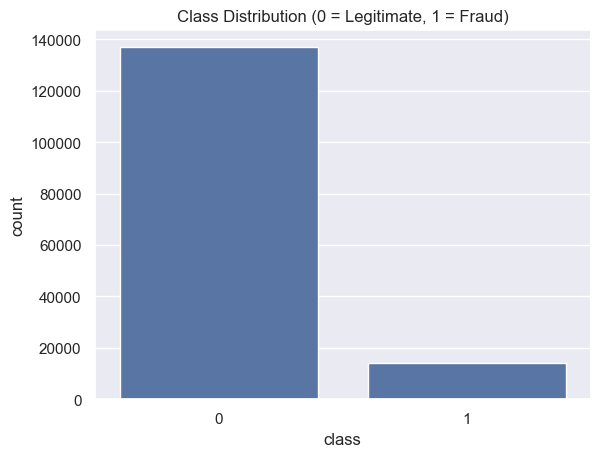

In [41]:
sns.countplot(x='class', data=fraud)
plt.title("Class Distribution (0 = Legitimate, 1 = Fraud)")
plt.show()


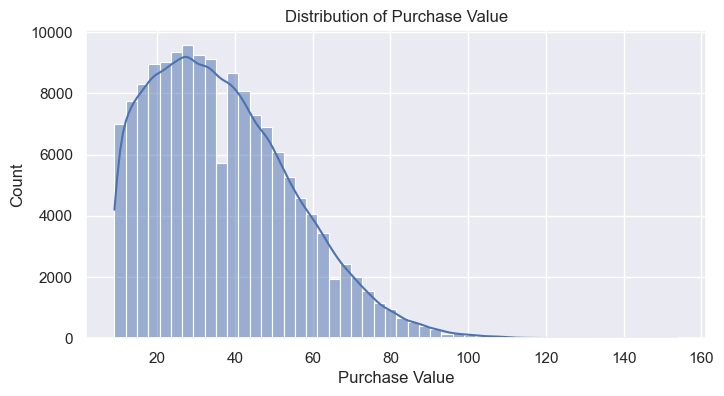

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(fraud['purchase_value'], bins=50, kde=True)
plt.title("Distribution of Purchase Value")
plt.xlabel("Purchase Value")
plt.show()


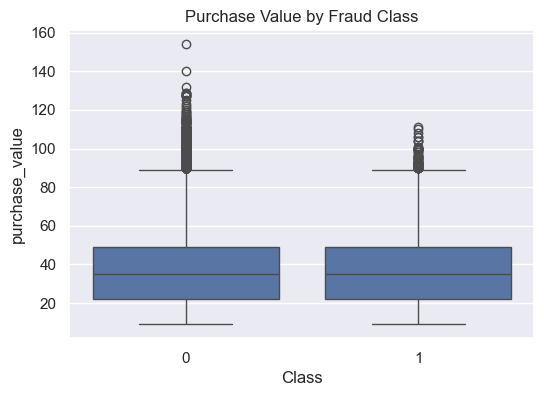

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='purchase_value', data=fraud)
plt.title("Purchase Value by Fraud Class")
plt.xlabel("Class")
plt.show()


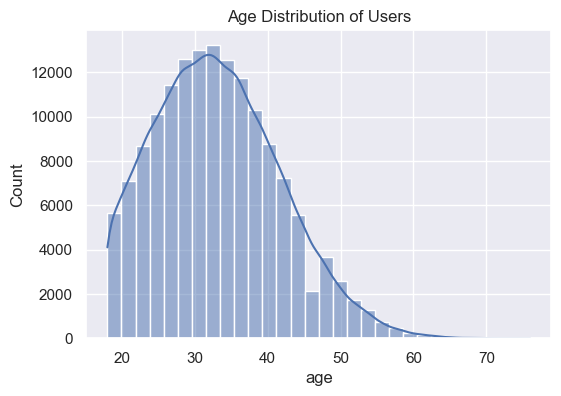

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(fraud['age'], bins=30, kde=True)
plt.title("Age Distribution of Users")
plt.show()


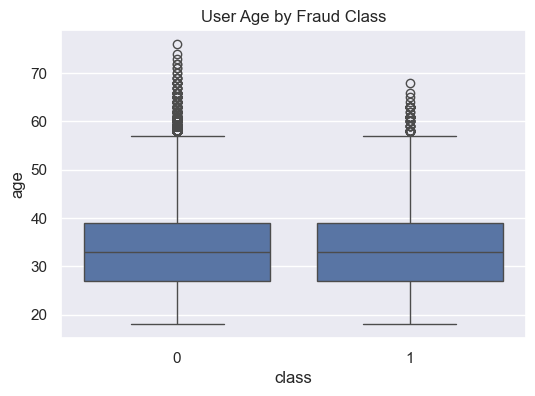

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='age', data=fraud)
plt.title("User Age by Fraud Class")
plt.show()


In [23]:
fraud[['source', 'browser', 'sex']].nunique()


source     3
browser    5
sex        2
dtype: int64

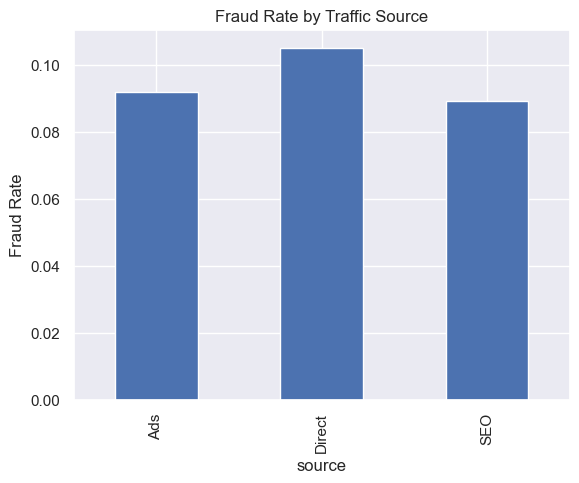

In [24]:
fraud.groupby('source')['class'].mean().sort_values(ascending=False)
fraud.groupby('source')['class'].mean().plot(kind='bar')
plt.title("Fraud Rate by Traffic Source")
plt.ylabel("Fraud Rate")
plt.show()


In [26]:
fraud.groupby('browser')['class'].mean().sort_values(ascending=False)

browser
Chrome     0.098792
FireFox    0.095165
Safari     0.090201
Opera      0.089227
IE         0.086775
Name: class, dtype: float64

In [27]:
fraud.groupby('sex')['class'].mean()


sex
F    0.091007
M    0.095523
Name: class, dtype: float64

In [28]:
fraud['ip_address'].describe()


count    1.511120e+05
mean     2.152145e+09
std      1.248497e+09
min      5.209350e+04
25%      1.085934e+09
50%      2.154770e+09
75%      3.243258e+09
max      4.294850e+09
Name: ip_address, dtype: float64

In [29]:
fraud['ip_int'] = fraud['ip_address'].astype(np.int64)
ip_country['lower_bound_ip_address'] = ip_country['lower_bound_ip_address'].astype(np.int64)
ip_country['upper_bound_ip_address'] = ip_country['upper_bound_ip_address'].astype(np.int64)


In [30]:
fraud = fraud.sort_values('ip_int')
ip_country = ip_country.sort_values('lower_bound_ip_address')


In [31]:
fraud = pd.merge_asof(
    fraud,
    ip_country,
    left_on='ip_int',
    right_on='lower_bound_ip_address',
    direction='backward'
)
fraud = fraud[
    fraud['ip_int'] <= fraud['upper_bound_ip_address']
]


In [32]:
fraud.groupby('country')['class'].mean().sort_values(ascending=False).head(10)
fraud['country'].value_counts().head(10)


country
United States        58049
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Italy                 1944
Name: count, dtype: int64

In [33]:
fraud.to_csv("../data/processed/fraud_cleaned.csv", index=False)


## EDA Summary

Key findings:
- The dataset contains no missing values or duplicates
- Fraudulent transactions represent a very small fraction of total transactions
- Fraud is associated with:
  - Higher purchase values
  - Short-lived accounts
  - Certain traffic sources and countries
- Severe class imbalance necessitates specialized modeling strategies

The cleaned dataset is now ready for feature engineering.
